In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [23]:
# 1. 数据加载与预处理
# 从CSV文件中读取数据，并将其存储在DataFrame对象df中
df = pd.read_csv("temperatureData.csv")

# 将"Date"列转换为datetime类型，以便后续将该列设置为索引时能够正确识别时间序列数据
df["Date"] = pd.to_datetime(df["Date"])

# 将"Date"列设置为索引，并根据时间顺序对数据进行排序
df = df.set_index("Date").sort_index()

# 显式地将时间序列数据的频率设置为每日（'D'代表日频）
# 这一步确保了即使原始数据缺失某些日期，也能创建一个具有完整日期范围的索引
df = df.asfreq('D')  # 'D' 表示每日数据

# 对"Temp"列中的缺失值使用前向填充方法进行填充（ffill），即用前一个观测值来填充当前的缺失值
df["Temp"] = df["Temp"].fillna(method="ffill")


<Figure size 1200x800 with 0 Axes>

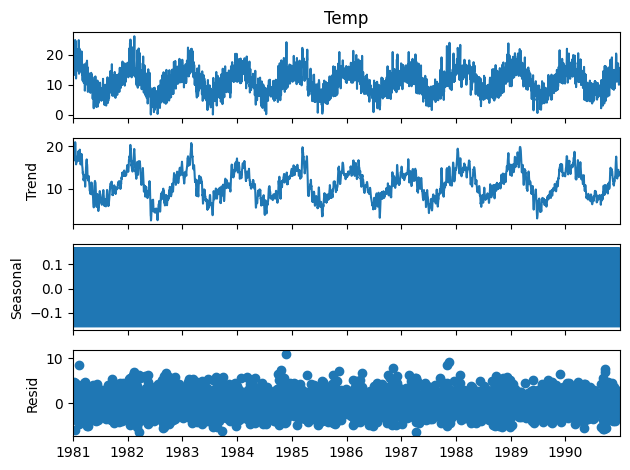

In [24]:
# 2. 时间序列可视化
# 使用matplotlib库绘制时间序列数据，以便直观地观察温度随时间的变化趋势

# 设置图表大小为12英寸宽、6英寸高
plt.figure(figsize=(12, 6))

# 绘制时间序列图，x轴为日期，y轴为温度值
# 'df.index' 表示时间索引（即日期），'df["Temp"]' 表示温度数据
plt.plot(df.index, df["Temp"], label="Temperature (°C)")

# 添加标题 "Daily Temperature Over Time"
plt.title("Daily Temperature Over Time")

# 添加x轴标签 "Date" 和 y轴标签 "Temperature (°C)"
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

# 显示图例，用于标识图中各元素的意义
plt.legend()

# 启用网格线，便于更准确地读取数据点
plt.grid(True)

# 展示绘图结果
plt.show()


In [25]:
# 3. 划分训练集与测试集
train = df["Temp"][:-7]
test = df["Temp"][-7:]

In [26]:
# 4. 构建模型并预测
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7).fit()
forecast = model.forecast(7)

In [27]:
# 5. 模型评估
# 使用测试集（test）和预测值（forecast）来评估时间序列预测模型的性能

# 计算平均绝对误差（Mean Absolute Error, MAE）
# MAE 表示预测值与真实值之间平均差异的大小，数值越小表示模型性能越好
mae = mean_absolute_error(test, forecast)

# 计算均方根误差（Root Mean Squared Error, RMSE）
# RMSE 是均方误差（MSE）的平方根，相比MAE对大误差更敏感，也常用于回归模型的评估
rmse = np.sqrt(mean_squared_error(test, forecast))

# 打印MAE值，保留两位小数
print(f"MAE: {mae:.2f}")

# 打印RMSE值，保留两位小数
print(f"RMSE: {rmse:.2f}")


MAE: 1.72
RMSE: 1.96


MAE 的单位与目标变量相同，在这里单位是摄氏度（°C）。
MAE 值越小，表示预测精度越高。
在模型中，MAE 为 1.72°C，这意味着模型预测的温度平均偏离真实值约 1.72°C。

RMSE 的单位也与目标变量相同，在这里是摄氏度（°C）。
RMSE 更加关注大误差，因为对误差进行了平方处理，所以它对较大的预测错误更加敏感。
在模型中，RMSE 为 1.96°C，这表明模型在预测时存在一些较大的误差。

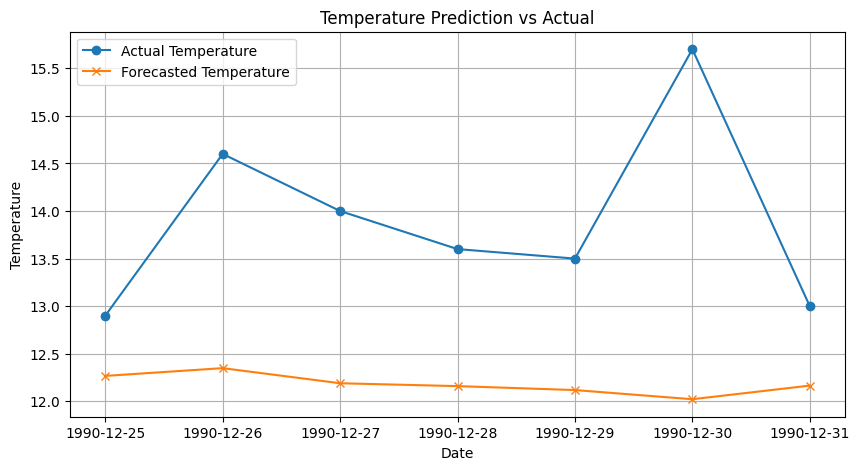

In [28]:
# 6. 可视化预测结果与测试集
# 使用 matplotlib 绘制实际温度值与预测温度值的对比图，以便直观地评估模型预测效果

# 设置图表大小为10英寸宽、5英寸高
plt.figure(figsize=(10, 5))

# 绘制测试集中实际温度的折线图
# x轴为 test 的索引（日期），y轴为实际温度值
# 使用圆形标记（marker='o'）表示实际观测数据点，并添加图例标签 "Actual Temperature"
plt.plot(test.index, test.values, label='Actual Temperature', marker='o')

# 绘制预测温度值的折线图
# x轴为 forecast 的索引（日期），y轴为预测温度值
# 使用叉形标记（marker='x'）表示预测值，并添加图例标签 "Forecasted Temperature"
plt.plot(forecast.index, forecast.values, label='Forecasted Temperature', marker='x')

# 添加图表标题 "Temperature Prediction vs Actual"
plt.title('Temperature Prediction vs Actual')

# 添加x轴标签 "Date" 和 y轴标签 "Temperature"
plt.xlabel('Date')
plt.ylabel('Temperature')

# 显示图例，用于标识图中各条折线的意义
plt.legend()

# 启用网格线，便于更准确地读取数据点
plt.grid(True)

# 展示绘图结果
plt.show()
